In [8]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
plt.rcParams['figure.figsize'] = (15.0, 15.0)
import numpy as np
import copy

In [9]:
def board_set(length, width, inside = None):
    # Create a board: length x length x width

    # input:
    # inside: grey square

    # return:
    # faces, boundary, connection nodes, bottom center point
    # faces: [board, grey square] represented by faces face: [[point1],[point2],...] 
    # boundary: [x,y]
    # connection nodes: [bef, aft], bef = [[point1],[point2],...], bef is a set of points connecting to the former element
    # bottom center point: [up_c, down_c], up_c = [point1], up_c = center point of the upper face 
    
    xr = width+length/2/2**0.5
    yr = length*(1+1/2/2**0.5)
    box = [[0,0],[width, 0],[width, length],[0,length],[0,0]]
    side = [[width,0],[width+length/2/2**0.5,length/2/2**0.5],[width+length/2/2**0.5,\
                                                                                   length/2/2**0.5+length],[width,length],[width,0]]
    up = [[0,length],[width, length],[width+length/2/2**0.5, length*(1+1/2/2**0.5)],[length/2/2**0.5, \
                                                                                                                   length*(1+1/2/2**0.5)],[0,length]]
    inside_square = None
    if inside is not None:
        center = [width+length/4/2**0.5, length/2+length/4/2**0.5]
        inside_square = [[[center[0]-inside/4/2**0.5, center[1]-inside/2-inside/4/2**0.5],[center[0]+inside/4/2**0.5, \
                                                                                           center[1]-inside/2+inside/4/2**0.5],[center[0]+inside/4/2**0.5, \
                                                                                           center[1]+inside/2+inside/4/2**0.5],[center[0]-inside/4/2**0.5, \
                                                                                           center[1]+inside/2-inside/4/2**0.5],[center[0]-inside/4/2**0.5, \
                                                                                                                                          center[1]-inside/2-inside/4/2**0.5]]]

    if inside is not None:
        bef = [[length/2/2/2**0.5,length/2/2/2**0.5+length/2]]
        aft = inside_square[0][:-1]
    else:
        bef = None
        aft = None

    up_c = [width/2+length/4/2**0.5, length+length/4/2**0.5]
    down_c = [width/2+length/4/2**0.5, length/4/2**0.5]

    return [[box, side, up],inside_square], [xr, yr], [bef, aft], [up_c, down_c]

def layer_set(length, width, inside = None):
    # inside: [0/1, 0/1, 0/1] up mid down

    xr = width
    yr = length
    box = [[0,0],[width, 0],[width, length],[0,length],[0,0]]

    bef = []
    aft = []
    bef.append([[0,0],[0,length]])
    aft.append([[width,0],[width, length]])

    inside_square = None
    if inside is not None:
        if inside == [0,0,0]:
            print('inside cannot be [0,0,0].')

        else:
            inside_square = []
            if inside[0] == 1:
                inside_square.append([[0,length-width],[width,length-width],[width,length],[0,length],\
                                      [0,length-width]])
                bef.append([[0,length-width],[0,length]])
                aft.append([[width,length-width],[width,length]])
            if inside[1] == 1:
                inside_square.append([[0,length/2-width/2],[width,length/2-width/2],[width,length/2+\
                                                                                                              width/2],[0,length/2+width/2],[0,length/2-width/2]])
                bef.append([[0,length/2-width/2],[0,length/2+width/2]])
                aft.append([[width,length/2-width/2],[width,length/2+width/2]])
            if inside[2] == 1:
                inside_square.append([[0,0],[width,0],[width,width],[0,width],[0,0]])  
                bef.append([[0,0],[0,width]])
                aft.append([[width,0],[width,width]])

    up = [width/2,length]
    down = [width/2,0]
    return [[box],inside_square], [xr, yr], [bef, aft], [up,down]

def plot_structure(faces, colors, bias, zorder = 0):
    # faces:
    # colors
    for i in range(len(faces)): # parts
        if faces[i] is not None:
            for j in range(len(faces[i])): # faces in the same part
                fx = []
                fy = []
                for k in range(len(faces[i][j])-1):
                    p1 = [faces[i][j][k][0]-bias[0], faces[i][j][k][1]-bias[1]]
                    p2 = [faces[i][j][k+1][0]-bias[0], faces[i][j][k+1][1]-bias[1]]
                    fx.append(p1[0])
                    fy.append(p1[1])
                    plt.plot([p1[0],p2[0]],[p1[1],p2[1]], c = 'k',zorder = zorder)
                if type(colors[i][0]) is not list:
                    plt.fill(fx, fy,c = colors[i],zorder = zorder)
                else:
                    plt.fill(fx, fy,c = colors[i][j],zorder = zorder)

def plot_connect(bef, aft, bias_set, color,zorder = 0,linestyle = ':'):
    # bias_set: [bias of bef, bias of aft]
    if bef is None or aft is None:
        print('None')
        return None
    bef1 = copy.deepcopy(bef)
    aft1 = copy.deepcopy(aft)
    for i in range(len(bef1)):
        for j in range(2):
            bef1[i][j] -= bias_set[0][j]
        
    for i in range(len(aft1)):
        for j in range(2):
            aft1[i][j] -= bias_set[1][j]

    if len(bef1) == 1:
        for p in aft1:
            plt.plot([bef1[0][0], p[0]],[bef1[0][1],p[1]],linestyle = linestyle,c = color,zorder = zorder)
    if len(aft1) == 1:
        for p in bef1:
            plt.plot([aft1[0][0], p[0]],[aft1[0][1],p[1]],linestyle = linestyle,c = color,zorder = zorder)
            
    if len(bef1) ==2 and len(aft1) == 4:
        plt.plot([bef1[0][0], aft1[0][0]],[bef1[0][1],aft1[0][1]],linestyle = linestyle,c = color,zorder = zorder)
        plt.plot([bef1[0][0], aft1[1][0]],[bef1[0][1],aft1[1][1]],linestyle = linestyle,c = color,zorder = zorder)
        plt.plot([bef1[1][0], aft1[2][0]],[bef1[1][1],aft1[2][1]],linestyle = linestyle,c = color,zorder = zorder)
        plt.plot([bef1[1][0], aft1[3][0]],[bef1[1][1],aft1[3][1]],linestyle = linestyle,c = color,zorder = zorder)
        
    if len(bef1) ==4 and len(aft1) == 2:
        plt.plot([bef1[0][0], aft1[0][0]],[bef1[0][1],aft1[0][1]],linestyle = linestyle,c = color,zorder = zorder)
        plt.plot([bef1[1][0], aft1[0][0]],[bef1[1][1],aft1[0][1]],linestyle = linestyle,c = color,zorder = zorder)
        plt.plot([bef1[2][0], aft1[1][0]],[bef1[2][1],aft1[1][1]],linestyle = linestyle,c = color,zorder = zorder)
        plt.plot([bef1[3][0], aft1[1][0]],[bef1[3][1],aft1[1][1]],linestyle = linestyle,c = color,zorder = zorder)
        
    if len(bef1) == len(aft1):
        for i in range(len(bef1)):
            plt.plot([bef1[i][0], aft1[i][0]],[bef1[i][1],aft1[i][1]],linestyle = linestyle,c = color,zorder = zorder)

def plot_loop(ss,ff, bias_set, bias, color = 'k', zorder = 0):
    # ss: start point
    # ff: end point
    # bias_set: [bias of ss, bias of ff]
    # bias: height
    s = [ss[0]-bias_set[0][0],ss[1]-bias_set[0][1]]
    f = [ff[0]-bias_set[1][0],ff[1]-bias_set[1][1]]
    plot_arrow([s,[s[0],s[1]+bias],[f[0],f[1]+bias],f], color = color, zorder=zorder)
    
def plot_arrow(point_set, color = 'k', zorder = 0):
    for i in range(len(point_set)-1):
        plt.plot([point_set[i][0],point_set[i+1][0]],[point_set[i][1],point_set[i+1][1]],color = color,zorder = zorder)
    plt.arrow(point_set[-2][0], point_set[-2][1], point_set[-1][0]-point_set[2][0], point_set[-1][1]-point_set[2][1], # start loc and vector
    head_width=0.1,facecolor = color,#head length，tail width
    length_includes_head = True,overhang = 0,zorder = zorder) # 

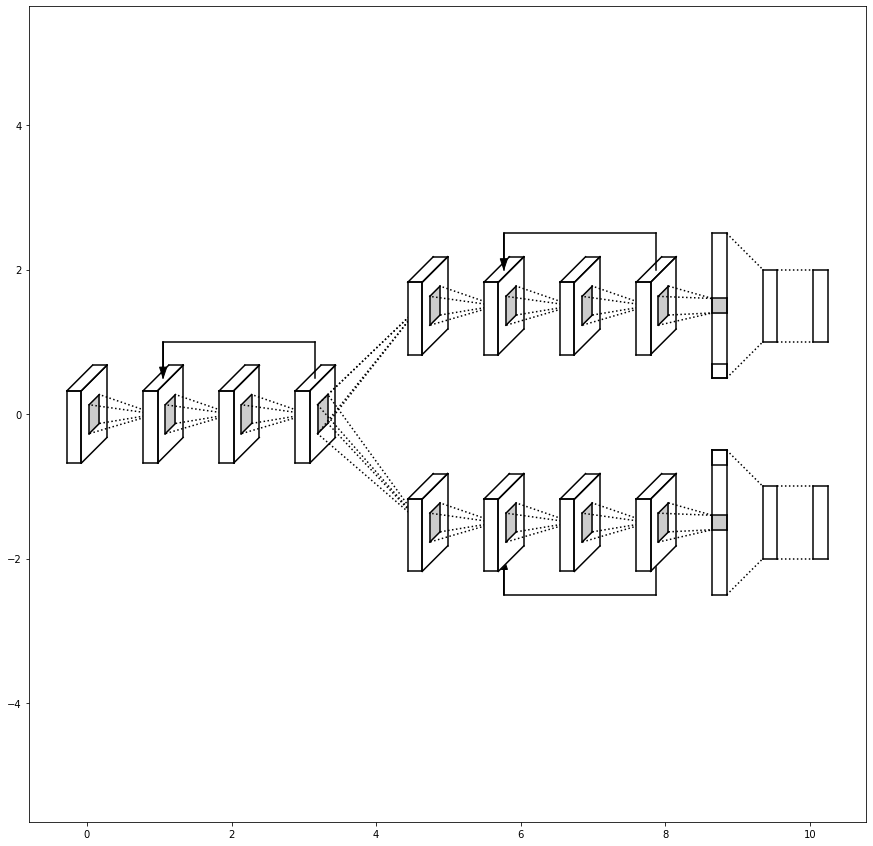

In [10]:
faces1 , boundary1, connect1,ud1= board_set(1,0.2,0.4)
bias1 = [boundary1[0]/2,boundary1[1]/2]
colors1 = [[1]*3,[0.8]*3]
plot_structure(faces1, colors1, bias1,zorder = 0)

faces2 , boundary2, connect2,ud2= board_set(1,0.2,0.4)
space12 = 0.5
bias2 = [bias1[0]- boundary1[0]-space12,boundary2[1]/2]
colors2 = [[1]*3,[0.8]*3]    
plot_connect(connect1[1],connect2[0], [bias1,bias2],[0]*3,zorder = 1)
plot_structure(faces2, colors2, bias2,zorder = 2)

faces3 , boundary3, connect3,ud3= board_set(1,0.2,0.4)
space23 = 0.5
bias3 = [bias2[0]- boundary2[0]-space23,boundary3[1]/2]
colors3 = [[1]*3,[0.8]*3]    
plot_connect(connect2[1],connect3[0], [bias2,bias3],[0]*3,zorder = 3)
plot_structure(faces3, colors3, bias3,zorder = 4)

faces4 , boundary4, connect4,ud4= board_set(1,0.2,0.4)
space34 = 0.5
bias4 = [bias3[0]- boundary3[0]-space34,boundary4[1]/2]
colors4 = [[1]*3,[0.8]*3]    
plot_connect(connect3[1],connect4[0], [bias3,bias4],[0]*3,zorder = 5)
plot_structure(faces4, colors4, bias4,zorder = 6)
plot_loop(ud4[0],ud2[0],[bias4,bias2],0.5,zorder = 7)

dis = bias4[0]
dis_h = 1.5
connect_pre = copy.deepcopy(connect4)
bias_pre = copy.deepcopy(bias4)


## down
height = dis_h
faces1 , boundary1, connect1,ud1= board_set(1,0.2,0.4)
bias1 = [dis-boundary4[0]-1,boundary1[1]/2+height]
colors1 = [[1]*3,[0.8]*3]
plot_connect(connect_pre[1],connect1[0], [bias_pre,bias1],[0]*3,zorder = 8)
plot_structure(faces1, colors1, bias1,zorder = 9)

faces2 , boundary2, connect2,ud2= board_set(1,0.2,0.4)
space12 = 0.5
bias2 = [bias1[0]- boundary1[0]-space12,boundary2[1]/2+height]
colors2 = [[1]*3,[0.8]*3]    
plot_connect(connect1[1],connect2[0], [bias1,bias2],[0]*3,zorder = 10)
plot_structure(faces2, colors2, bias2,zorder = 11)

faces3 , boundary3, connect3,ud3= board_set(1,0.2,0.4)
space23 = 0.5
bias3 = [bias2[0]- boundary2[0]-space23,boundary3[1]/2+height]
colors3 = [[1]*3,[0.8]*3]    
plot_connect(connect2[1],connect3[0], [bias2,bias3],[0]*3,zorder = 12)
plot_structure(faces3, colors3, bias3,zorder = 13)

faces4 , boundary4, connect4,ud4= board_set(1,0.2,0.4)
space34 = 0.5
bias4 = [bias3[0]- boundary3[0]-space34,boundary4[1]/2+height]
colors4 = [[1]*3,[0.8]*3]    
plot_connect(connect3[1],connect4[0], [bias3,bias4],[0]*3,zorder = 14)
plot_structure(faces4, colors4, bias4,zorder = 15)
plot_loop(ud4[1],ud2[1],[bias4,bias2],-0.5,zorder = 0)

faces5, boundary5,connect5, ud5 = layer_set(2,0.2,[1,1,0])
space45 = 0.5
bias5 = [bias4[0]-boundary4[0]-space45,boundary5[1]/2+height]
colors5 = [[1]*3,[[1]*3,[0.8]*3]]
plot_connect(connect4[1],connect5[0][2], [bias4,bias5],[0]*3,zorder = 16)
plot_structure(faces5, colors5, bias5,zorder = 17)

faces6, boundary6,connect6, ud6 = layer_set(1,0.2)
space56 = 0.5
bias6 = [bias5[0]-boundary5[0]-space56,boundary6[1]/2+height]
colors6 = [[1]*3]
plot_connect(connect5[1][0],connect6[0][0], [bias5,bias6],[0]*3,zorder = 18)
plot_structure(faces6, colors6, bias6,zorder = 19)

faces7, boundary7,connect7, ud7 = layer_set(1,0.2)
space67 = 0.5
bias7 = [bias6[0]-boundary6[0]-space67,boundary7[1]/2+height]
colors7 = [[1]*3]
plot_connect(connect6[1][0],connect7[0][0], [bias6,bias7],[0]*3,zorder = 19)
plot_structure(faces7, colors7, bias7,zorder = 20)

## up
height = -dis_h
faces1 , boundary1, connect1,ud1= board_set(1,0.2,0.4)
bias1 = [dis-boundary4[0]-1,boundary1[1]/2+height]
colors1 = [[1]*3,[0.8]*3]
plot_connect(connect_pre[1],connect1[0], [bias_pre,bias1],[0]*3,zorder = 8)
plot_structure(faces1, colors1, bias1,zorder = 9)

faces2 , boundary2, connect2,ud2= board_set(1,0.2,0.4)
space12 = 0.5
bias2 = [bias1[0]- boundary1[0]-space12,boundary2[1]/2+height]
colors2 = [[1]*3,[0.8]*3]    
plot_connect(connect1[1],connect2[0], [bias1,bias2],[0]*3,zorder = 10)
plot_structure(faces2, colors2, bias2,zorder = 11)

faces3 , boundary3, connect3,ud3= board_set(1,0.2,0.4)
space23 = 0.5
bias3 = [bias2[0]- boundary2[0]-space23,boundary3[1]/2+height]
colors3 = [[1]*3,[0.8]*3]    
plot_connect(connect2[1],connect3[0], [bias2,bias3],[0]*3,zorder = 12)
plot_structure(faces3, colors3, bias3,zorder = 13)

faces4 , boundary4, connect4,ud4= board_set(1,0.2,0.4)
space34 = 0.5
bias4 = [bias3[0]- boundary3[0]-space34,boundary4[1]/2+height]
colors4 = [[1]*3,[0.8]*3]    
plot_connect(connect3[1],connect4[0], [bias3,bias4],[0]*3,zorder = 14)
plot_structure(faces4, colors4, bias4,zorder = 15)
plot_loop(ud4[0],ud2[0],[bias4,bias2],0.5,zorder = 16)

faces5, boundary5,connect5, ud5 = layer_set(2,0.2,[0,1,1])
space45 = 0.5
bias5 = [bias4[0]-boundary4[0]-space45,boundary5[1]/2+height]
colors5 = [[1]*3,[[0.8]*3,[1]*3]]
plot_connect(connect4[1],connect5[0][1], [bias4,bias5],[0]*3,zorder = 16)
plot_structure(faces5, colors5, bias5,zorder = 17)

faces6, boundary6,connect6, ud6 = layer_set(1,0.2)
space56 = 0.5
bias6 = [bias5[0]-boundary5[0]-space56,boundary6[1]/2+height]
colors6 = [[1]*3]
plot_connect(connect5[1][0],connect6[0][0], [bias5,bias6],[0]*3,zorder = 18)
plot_structure(faces6, colors6, bias6,zorder = 19)

faces7, boundary7,connect7, ud7 = layer_set(1,0.2)
space67 = 0.5
bias7 = [bias6[0]-boundary6[0]-space67,boundary7[1]/2+height]
colors7 = [[1]*3]
plot_connect(connect6[1][0],connect7[0][0], [bias6,bias7],[0]*3,zorder = 19)
plot_structure(faces7, colors7, bias7,zorder = 20)


plt.axis('equal')
# plt.savefig('t.png', dpi=1200)
plt.show()

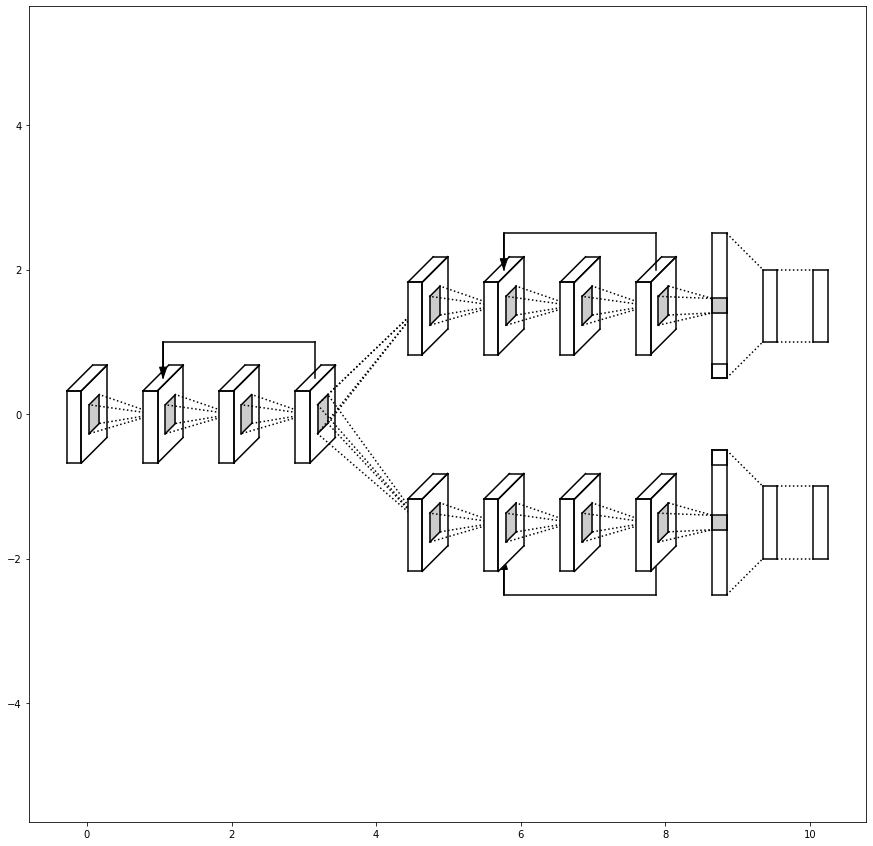

In [42]:
board_faces , board_boundary, board_connect,board_ud= board_set(1,0.2,0.4)
layer_l_d_faces, layer_l_d_boundary,layer_l_d_connect, layer_l_d_ud = layer_set(2,0.2,[0,1,1])
layer_l_u_faces, layer_l_u_boundary,layer_l_u_connect, layer_l_u_ud = layer_set(2,0.2,[1,1,0])
layer_s_faces, layer_s_boundary,layer_s_connect, layer_s_ud = layer_set(1,0.2)
layer_l_d_colors = [[1]*3,[[0.8]*3,[1]*3]]
layer_l_u_colors = [[1]*3,[[1]*3,[0.8]*3]]
layer_s_colors = [[1]*3]
board_colors = [[1]*3,[0.8]*3]
zorder = 0
space = 0.5

height = 0
bias1 = [[boundary1[0]/2,boundary1[1]/2-height]]
for i in range(3):
    bias1.append([bias1[-1][0]- board_boundary[0]-space,board_boundary[1]/2-height])

plot_structure(board_faces, board_colors, bias1[0],zorder = zorder)
zorder += 1
for i in range(3):
    plot_connect(board_connect[1],board_connect[0], [bias1[i],bias1[i+1]],[0]*3,zorder = zorder)
    zorder += 1
    plot_structure(board_faces, board_colors, bias1[i+1],zorder = zorder)
    zorder += 1
plot_loop(board_ud[0],board_ud[0],[bias1[3],bias1[1]],0.5,zorder = zorder)



height = 1.5
bias2 = []
bias2.append([bias1[-1][0]- board_boundary[0]-1,board_boundary[1]/2-height])
for i in range(3):
    bias2.append([bias2[-1][0]- board_boundary[0]-space,board_boundary[1]/2-height])
    
bias2.append([bias2[-1][0]- board_boundary[0]-space,layer_l_d_boundary[1]/2-height])
bias2.append([bias2[-1][0]- layer_l_d_boundary[0]-space,layer_s_boundary[1]/2-height])
bias2.append([bias2[-1][0]- layer_s_boundary[0]-space,layer_s_boundary[1]/2-height])

plot_connect(board_connect[1],board_connect[0], [bias1[-1],bias2[0]],[0]*3,zorder = zorder)
zorder += 1
plot_structure(board_faces, board_colors, bias2[0],zorder = zorder)
zorder += 1
    
for i in range(3):
    plot_connect(board_connect[1],board_connect[0], [bias2[i],bias2[i+1]],[0]*3,zorder = zorder)
    zorder += 1
    plot_structure(board_faces, board_colors, bias2[i+1],zorder = zorder)
    zorder += 1
plot_loop(board_ud[0],board_ud[0],[bias2[3],bias2[1]],0.5,zorder = zorder)

plot_connect(board_connect[1],layer_l_d_connect[0][1], [bias2[3],bias2[4]],[0]*3,zorder = zorder)
zorder += 1
plot_structure(layer_l_d_faces, layer_l_d_colors, bias2[4],zorder = zorder)
zorder += 1

plot_connect(layer_l_d_connect[1][0],layer_s_connect[0][0], [bias2[4],bias2[5]],[0]*3,zorder = zorder)
zorder += 1
plot_structure(layer_s_faces, layer_s_colors, bias2[5],zorder = zorder)
zorder += 1

plot_connect(layer_s_connect[1][0],layer_s_connect[0][0], [bias2[5],bias2[6]],[0]*3,zorder = zorder)
zorder += 1
plot_structure(layer_s_faces, layer_s_colors, bias2[6],zorder = zorder)
zorder += 1



height = -1.5
bias3 = []
bias3.append([bias1[-1][0]- board_boundary[0]-1,board_boundary[1]/2-height])
for i in range(3):
    bias3.append([bias3[-1][0]- board_boundary[0]-space,board_boundary[1]/2-height])
    
bias3.append([bias3[-1][0]- board_boundary[0]-space,layer_l_d_boundary[1]/2-height])
bias3.append([bias3[-1][0]- layer_l_u_boundary[0]-space,layer_s_boundary[1]/2-height])
bias3.append([bias3[-1][0]- layer_s_boundary[0]-space,layer_s_boundary[1]/2-height])

plot_connect(board_connect[1],board_connect[0], [bias1[-1],bias3[0]],[0]*3,zorder = zorder)
zorder += 1
plot_structure(board_faces, board_colors, bias3[0],zorder = zorder)
zorder += 1
    
for i in range(3):
    plot_connect(board_connect[1],board_connect[0], [bias3[i],bias3[i+1]],[0]*3,zorder = zorder)
    zorder += 1
    plot_structure(board_faces, board_colors, bias3[i+1],zorder = zorder)
    zorder += 1
plot_loop(board_ud[1],board_ud[1],[bias3[3],bias3[1]],-0.5,zorder = 0)

plot_connect(board_connect[1],layer_l_u_connect[0][2], [bias3[3],bias3[4]],[0]*3,zorder = zorder)
zorder += 1
plot_structure(layer_l_u_faces, layer_l_u_colors, bias3[4],zorder = zorder)
zorder += 1

plot_connect(layer_l_u_connect[1][0],layer_s_connect[0][0], [bias3[4],bias3[5]],[0]*3,zorder = zorder)
zorder += 1
plot_structure(layer_s_faces, layer_s_colors, bias3[5],zorder = zorder)
zorder += 1

plot_connect(layer_s_connect[1][0],layer_s_connect[0][0], [bias3[5],bias3[6]],[0]*3,zorder = zorder)
zorder += 1
plot_structure(layer_s_faces, layer_s_colors, bias3[6],zorder = zorder)
zorder += 1


plt.axis('equal')
# plt.savefig('t.png', dpi=1200)
plt.show()